# Non-linear methods

In [1]:
import numpy as np
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC

## The Data

In [2]:
features, labels = make_circles(100, factor=.1, noise=.1)

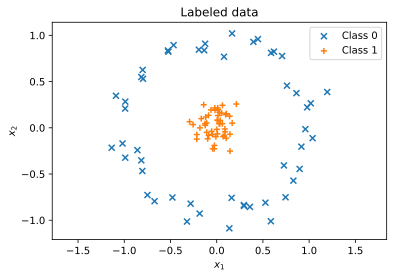

In [3]:
def plot_prediction(features, y_true, y_predicted):
    labels = np.unique(y_true)
    for i, (label, marker) in enumerate(zip(labels, "x+*.")):
        class_data = features[y_true == label]
        # Color is given by the predicted label
        colors = [f"C{predicted - labels.min()}" for predicted in y_predicted[y_true == label]]
        plt.scatter(class_data[:, 0], class_data[:, 1], marker=marker, label=f"Class {label}", c=colors)
    plt.legend()
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.axis("equal")

plt.title("Labeled data")
plot_prediction(features, labels, labels)
x_range = plt.xlim()
y_range = plt.ylim()

## Fit the data

In [4]:
def plot_decision_boundary(x_range, y_range, fit, samples=200, color="C1", margin=False):
    x, y = np.meshgrid(np.linspace(*x_range, samples), np.linspace(*y_range, samples))
    positions = np.stack((x.reshape(-1), y.reshape(-1)), axis=1).reshape(-1, 2)
    if margin:
        prediction = fit.decision_function(positions)
        levels = [-1, 0, 1]
        linestyles = ['--', '-', '--']
    else:
        prediction = fit.predict(positions)
        levels = [0]
        linestyles = ["-"]
    cntr = plt.contour(x, y, prediction.reshape(samples, samples),
                       colors=color, levels=[-1, 0, 1],
                       linestyles=linestyles)
    return cntr.legend_elements()[0][1]

def plot_prediction_grid(x_range, y_range, fit, samples=100):
    x, y = np.meshgrid(np.linspace(*x_range, samples), np.linspace(*y_range, samples))
    positions = np.stack((x.reshape(-1), y.reshape(-1)), axis=1).reshape(-1, 2)
    prediction = fit.predict_proba(positions)[:, 1]
    plt.imshow(prediction.reshape(samples, samples), origin="lower", extent=(x.min(), x.max(), y.min(), y.max()),
               cmap="coolwarm", vmin=0, vmax=1, alpha=0.3)
    plt.colorbar(label="Predicted Probability class -1")


### Linear SVM

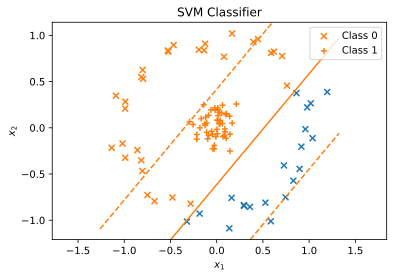

In [5]:
svm = SVC(gamma="scale", kernel="linear", C=10)
svm.fit(features, labels)

plt.title("SVM Classifier")
predicted_labels = svm.predict(features)
plot_decision_boundary(x_range, y_range, svm, margin=True)
plot_prediction(features, labels, predicted_labels)

### Use new features

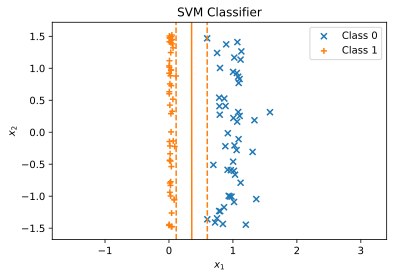

In [6]:
radius = np.sum(features ** 2, axis=1)
phi = np.arctan(features[:, 1] / features[:, 0])

mod_features = np.stack([radius, phi], 1)

svm = SVC(gamma="scale", kernel="linear", C=10)
svm.fit(mod_features, labels)

plt.title("SVM Classifier")
predicted_labels = svm.predict(mod_features)
plot_prediction(mod_features, labels, predicted_labels)
plot_decision_boundary(plt.xlim(), plt.ylim(), svm, margin=True)

### Non-linear SVM

Use a radial basis function kernel

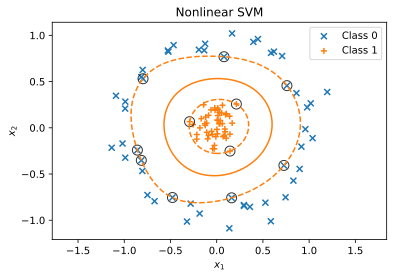

In [7]:
svm = SVC(gamma="scale", kernel="rbf", C=20)
svm.fit(features, labels)

plt.title("Nonlinear SVM")
predicted_labels = svm.predict(features)
plot_decision_boundary(x_range, y_range, svm, margin=True)
plot_prediction(features, labels, predicted_labels)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors="k", 
            alpha=0.8)